Now that we have our text data cleaned, we will attempt some manner of analysis.

In [19]:
import numpy as np
import os
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
from wordcloud import WordCloud

First, we perform our analysis on the data from the NewsAPI requests.

In [9]:
%store -r myanmar_texts
%store -r nyt_texts

We begin by building a word cloud, to try to identify visually which words seem to be most significant.

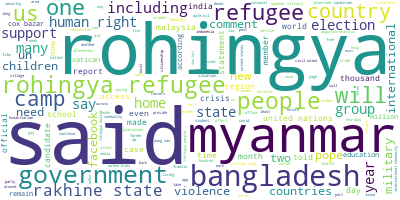

In [24]:
# join all the different processed text together
long_string = ','.join(list(myanmar_texts['text'].values))

# create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# generate word cloud
wordcloud.generate(long_string)

# output word cloud
wordcloud.to_image()

We see that "rohingya" and "myanmar" are quite prominent, as is "said". This makes sense, since many of these news stories are interviews with refugees, so the word "said" is expected to feature prominently.

Following our word cloud, we visualize the 10 most common words across our corpus.

In [25]:
# load libraries with CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

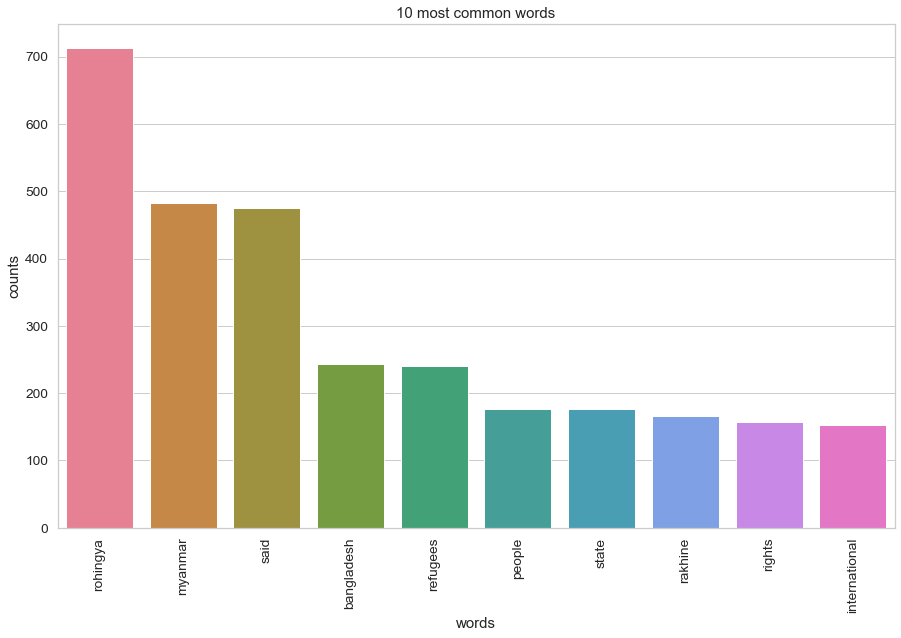

In [35]:
def plot_10_most_common_words(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# initialize count vectorizer with English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# fit and transform processed text
count_data = count_vectorizer.fit_transform(myanmar_texts['text'])

# visualize 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

Next, we fit a Latent Dirichlet Allocation model to our corpus. We'll na&iuml;vely begin with 10 topics, and reasses from there.

In [27]:
# load LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [28]:
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# these values can be altered (suggested to use int values < 15)
number_topics = 10
number_words = 10

# create and fit LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# print the topics found by the LDA model and their top words
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
information facebook said emergency people government communities community english bushfire

Topic #1:
pope afineevsky admissions refugee film francis refugees francesco administration trump

Topic #2:
said military amnesty killed myanmar rakhine police rohingya drug refugees

Topic #3:
said myanmar rohingya election rakhine pope francis military state people

Topic #4:
rohingya case myanmar icc investigation crimes state international universal jurisdiction

Topic #5:
rohingya myanmar reuters said people covid 19 united world statement

Topic #6:
rohingya myanmar bangladesh refugees said humanitarian refugee camps children united

Topic #7:
rohingya myanmar app said rights election international eu bangladesh candidates

Topic #8:
said rohingya facebook oil palm malaysia workers reuters myanmar group

Topic #9:
said year school rohingya students refugee indonesia 19 local people


We see pretty clearly that some of these topics are not at all useful. We'll still go ahead and build a visualization of this model.

In [29]:
from pyLDAvis import sklearn as sklearn_lda 
import pyLDAvis

In [30]:
LDAvis_data_filepath = os.path.join('./ldavis_prepared_newsapi_'+str(number_topics)+'.html')
LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_newsapi_'+ str(number_topics) +'.html')

Now we want to try again with only 3 topics.

In [36]:
# these values can be altered (suggested to use int values < 15)
number_topics = 3
number_words = 10

# create and fit LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# print the topics found by the LDA model and their top words
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
said rohingya pope myanmar francis vatican reuters app facebook comments

Topic #1:
rohingya myanmar said rakhine military election state rights government people

Topic #2:
rohingya said myanmar bangladesh refugees refugee humanitarian united support international


These topics seem much more useful!

In [37]:
LDAvis_data_filepath = os.path.join('./ldavis_prepared_newsapi_'+str(number_topics)+'.html')
LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_newsapi_'+ str(number_topics) +'.html')

Now we perform the same analysis on our mined New York Times articles. Note that this dataset is an order of magnitude larger than the previous one, so we might be able to glean some more useful modelling from this corpus.

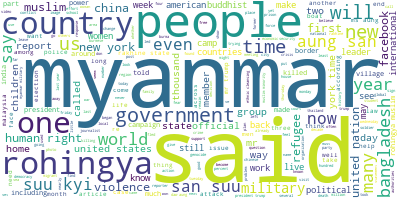

In [38]:
# join all the different processed text together
long_string = ','.join(list(nyt_texts['text'].values))

# create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# generate word cloud
wordcloud.generate(long_string)

# output word cloud
wordcloud.to_image()

We see now that "myanmar" and "people" are quite prominent, as is "said". Once again, this makes sense, since many of these news stories are interviews with refugees, so the word "said" is expected to feature prominently.

Following our word cloud, we visualize the 10 most common words across our corpus.

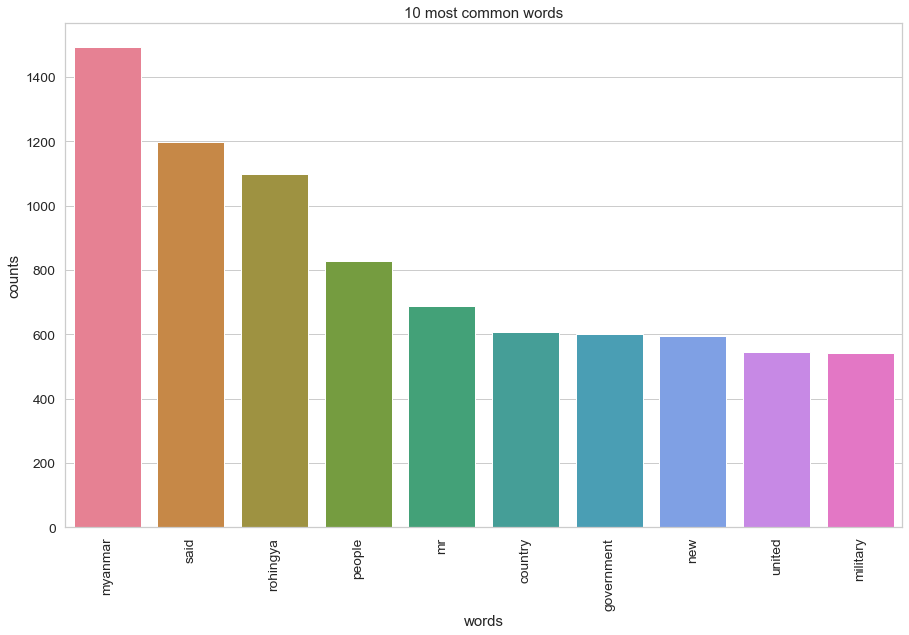

In [39]:
# initialize count vectorizer with English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# fit and transform processed text
count_data = count_vectorizer.fit_transform(nyt_texts['text'])

# visualize 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

We once again begin by fitting 10 topics.

In [40]:
# these values can be altered (suggested to use int values < 15)
number_topics = 10
number_words = 10

# create and fit LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# print the topics found by the LDA model and their top words
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
new times china trump india york news people mr government

Topic #1:
like facebook people news new just times know world time

Topic #2:
new york times saudi story time life american world said

Topic #3:
myanmar said mr rohingya new times year reporters journalists rights

Topic #4:
myanmar rohingya said military government united country aung suu kyi

Topic #5:
people said police women state new violence world report men

Topic #6:
said mr trump facebook people president new world united states

Topic #7:
new said mr york father president times minura years old

Topic #8:
trump north president korea mr south minister nuclear korean prime

Topic #9:
people world said health virus coronavirus like australia new pandemic


Once again, some of these topics seem to be deeply unrelated to what we're looking for. To be clear, however, this is not a bad thing, as it shows that there are other patterns in these news articles than just the words "rohingya" and "myanmar" over and over again.

In [41]:
LDAvis_data_filepath = os.path.join('./ldavis_prepared_nyt_'+str(number_topics)+'.html')
LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_nyt_'+ str(number_topics) +'.html')

Let's try modelling with only 3 topics again, and see what happens.

In [42]:
# these values can be altered (suggested to use int values < 15)
number_topics = 3
number_words = 10

# create and fit LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# print the topics found by the LDA model and their top words
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
myanmar rohingya said government military people country united rights state

Topic #1:
new trump mr times like said people president york news

Topic #2:
facebook people world like india social new coronavirus china said


Some of the topics still seem to be pretty unrelated to what we're looking for. It seems that there are a number of significant patterns in the New York Times articles that mention the Rohingya crisis. Perhaps these are further avenues to search for emergent commonalities.

In [43]:
LDAvis_data_filepath = os.path.join('./ldavis_prepared_nyt_'+str(number_topics)+'.html')
LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_nyt_'+ str(number_topics) +'.html')